In [1]:
%pip install scikit-learn pandas matplotlib seaborn imbalanced-learn scipy numpy mlxtend networkx shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.1/548.1 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.2/26.2 MB 13.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [mlxtend]m6/8 [shap]]te]
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
os.environ['SCIPY_ARRAY_API'] = '1'

# Relatório de pré processamento do pi 6 semestre
### Este documento tem como finalidade explicar como foi realizado o pré processamento da base do pi

Aluno: Késsia Rodrigues Borges

A base utilizada é uma base com dados de pessoas diabéticas(2), não diabéticas(0) e pré diabéticas(1)
O objetivo do trabalho final é obter uma recomendação confiável, onde com base nos dados inputados pelo usuário, possa classificá-lo e recomendar bons hábitos

---

### 1. Inicialização e definição de atributos

```python
class PreProcessor:
    def __init__(self, path='diabetes_012_health_indicators_BRFSS2015.csv'):
        self.path = path
        self.colunas_irrelevantes = ['AnyHealthcare', 'NoDocbcCost', 'Income', 'Education']
        self.scaler = StandardScaler()
        self.df = pd.read_csv(self.path)
```

* **`self.path`**: caminho do arquivo de entrada.
* **`self.colunas_irrelevantes`**: lista das features que serão removidas por baixa relevância, baseada em análise de correlação.
* **`self.scaler`**: instância do `StandardScaler`, que normaliza as features para média 0 e desvio padrão 1.
* **`self.df`**: DataFrame com os dados carregados do arquivo CSV.

---

### 2. Análise de correlação

```python
def correlation(self):
    correlacao = self.df.corr()
    plt.figure(figsize=(14, 10))
    sns.heatmap(correlacao, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
    plt.title('Matriz de Correlação da Base de Diabetes')
    plt.show()
```

* **`self.df.corr()`**: calcula a matriz de correlação de Pearson entre todas as colunas numéricas do DataFrame.
* **Heatmap**: visualiza rapidamente relações lineares entre atributos e a variável alvo (`Diabetes_012`), embasando a exclusão de variáveis irrelevantes.

---

### 3. Pré-processamento e limpeza

```python
def pre_process(self, arquivo_saida):
    self.correlation()
    self.df = self.df.drop(columns=self.colunas_irrelevantes)
    valores_nulos = self.df.isnull().sum()
    print(valores_nulos)
    X = self.df.drop('Diabetes_012', axis=1)
    y = self.df['Diabetes_012']
    X_norm = self.scaler.fit_transform(X)
    self.df_normalizado = pd.DataFrame(X_norm, columns=X.columns)
    self.df_normalizado['Diabetes_012'] = y.reset_index(drop=True)
    self.df_normalizado.to_csv(arquivo_saida, index=False)
```

#### **Passos detalhados:**

1. **`self.correlation()`**: mostra a matriz de correlação antes da remoção das colunas.
2. **Remoção das colunas irrelevantes**: `self.df.drop(columns=self.colunas_irrelevantes)` elimina variáveis que não contribuem para a predição.
3. **Checagem de valores nulos**: `self.df.isnull().sum()` exibe a contagem de nulos por coluna, auxiliando na identificação de inconsistências.
4. **Separação de variáveis**:

   * `X = self.df.drop('Diabetes_012', axis=1)`: atributos preditores.
   * `y = self.df['Diabetes_012']`: variável alvo.
5. **Normalização**:
   * Esse processo foi executado apenas depois dos dados tratados já exportados para um csv, já que para algumas partes do processo, é necessário o valor categórico da coluna (0 e 1) 
   * `self.scaler.fit_transform(X)` ajusta os dados para média 0 e desvio padrão 1, fundamental para métodos baseados em distância como KNN.
6. **Criação do DataFrame final**:

   * Junta os dados normalizados e a coluna alvo em um novo DataFrame.
7. **Exportação**:

   * `to_csv(arquivo_saida, index=False)` salva o resultado em CSV pronto para modelagem.



In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

class PreProcessor:
	def __init__(self, path='diabetes_012_health_indicators_BRFSS2015.csv'):
			self.path = path
			self.colunas_irrelevantes = ['AnyHealthcare', 'NoDocbcCost', 'Income', 'Education']
			self.scaler = StandardScaler()
			self.df = pd.read_csv(self.path)

	def correlation(self): 
		# Aqui é exibida a matriz de correlação para julgar se faz sentido as colunas que serão excluídas, 
		# Com base nos dados obtidos no gráfico, remover as colunas ['AnyHealthcare', 'NoDocbcCost', 'Income', 'Education'] faz sentido
		correlacao = self.df.corr()
		plt.figure(figsize=(14, 10))
		sns.heatmap(correlacao, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
		plt.title('Matriz de Correlação da Base de Diabetes')
		plt.show()

	def pre_process(self, arquivo_saida): 
		# Exibe a correlação
		self.correlation()
		# Remove as colunas irrelevantes
		self.df = self.df.drop(columns=self.colunas_irrelevantes)
		valores_nulos = self.df.isnull().sum()

		# Exibir valores nulos
		print(valores_nulos)
		# Remove a classe
		X = self.df.drop('Diabetes_012', axis=1)
		y = self.df['Diabetes_012']

		# Verificando quantas instancias tem para cada classe
		print(y.value_counts())


		# Salva a base
		self.df_normalizado = pd.DataFrame(X, columns=X.columns)
		self.df_normalizado['Diabetes_012'] = y.reset_index(drop=True)
		self.df_normalizado.to_csv(arquivo_saida, index=False)






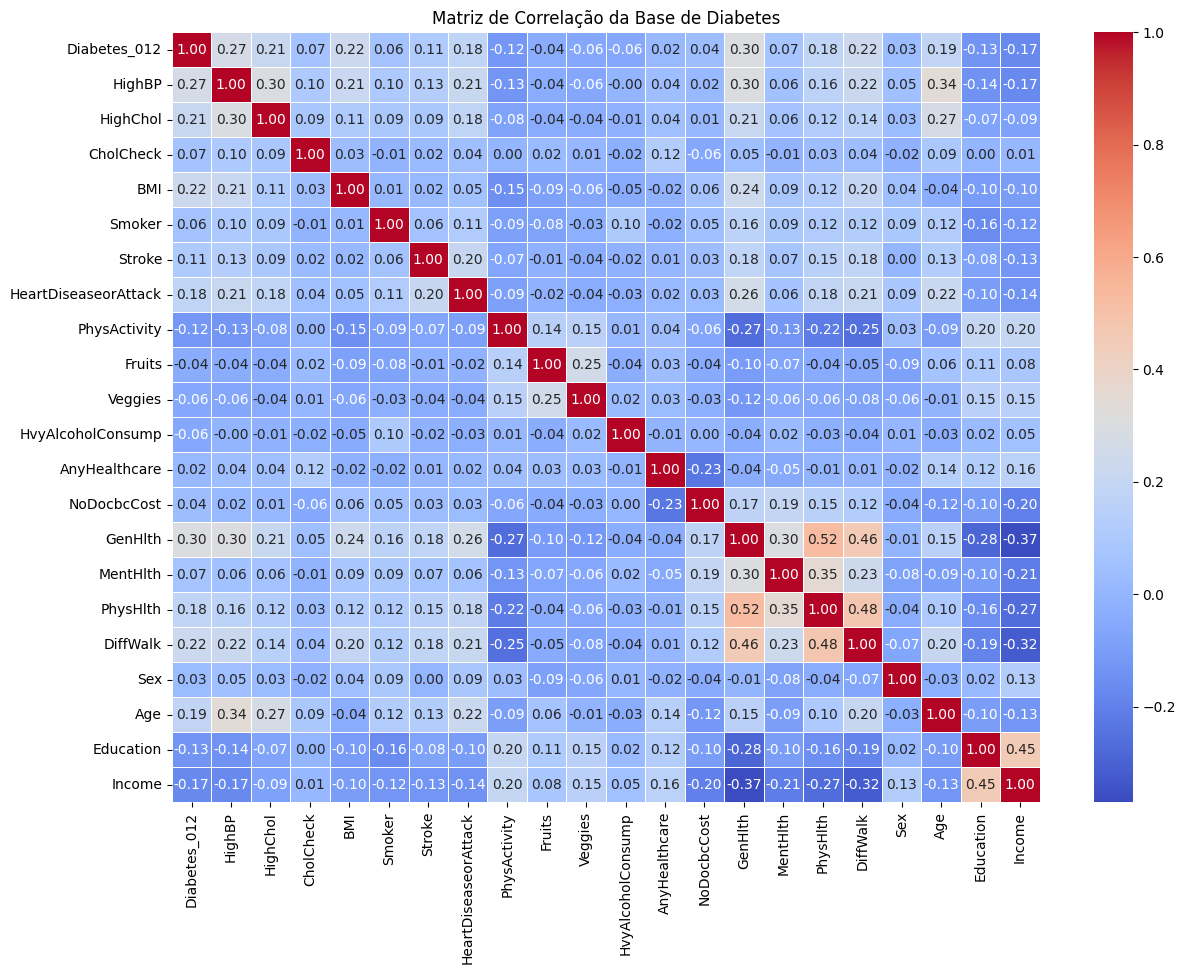

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
dtype: int64
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64


In [4]:
pre_processor = PreProcessor()
pre_processor.pre_process("cleaned.csv")

In [5]:
df = pd.read_csv("cleaned.csv")

df.info()
X = df.drop("Diabetes_012", axis=1)
Y = df["Diabetes_012"]

# Executa a normalização após leitura do dataframe pois o original será utilizado no apriori
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm  = scaler.fit_transform(X)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                253680 non-null  float64
 1   HighChol              253680 non-null  float64
 2   CholCheck             253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Stroke                253680 non-null  float64
 6   HeartDiseaseorAttack  253680 non-null  float64
 7   PhysActivity          253680 non-null  float64
 8   Fruits                253680 non-null  float64
 9   Veggies               253680 non-null  float64
 10  HvyAlcoholConsump     253680 non-null  float64
 11  GenHlth               253680 non-null  float64
 12  MentHlth              253680 non-null  float64
 13  PhysHlth              253680 non-null  float64
 14  DiffWalk              253680 non-null  float64
 15  

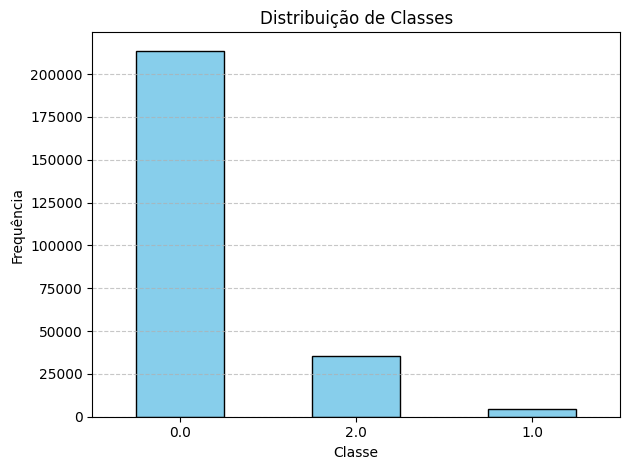

In [6]:
contagem_classes = df['Diabetes_012'].value_counts()

contagem_classes.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribuição de Classes')
plt.xlabel('Classe')
plt.ylabel('Frequência')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
from imblearn.combine import SMOTEENN

smoteenn = SMOTEENN(random_state=42)
X_combined, y_combined = smoteenn.fit_resample(X_norm, Y)

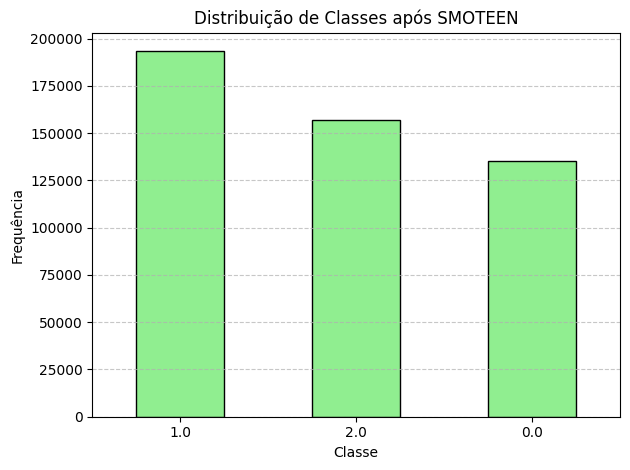

In [ ]:
y_res_series = pd.Series(y_combined, name='Diabetes_012')


contagem_classes = y_res_series.value_counts()


contagem_classes.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribuição de Classes após SMOTEEN')
plt.xlabel('Classe')
plt.ylabel('Frequência')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, train_size=0.2, random_state=32, stratify=Y)

scoring = {
    'accuracy': 'accuracy',
    'f1_macro': 'f1_macro',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro'
}

models = {
    "KNN": (KNeighborsClassifier(n_neighbors=5), {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }),
    "RandomForest": (RandomForestClassifier(n_estimators=100, random_state=32), {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20]
        }),
    "GradientBoosting": (GradientBoostingClassifier(random_state=32),   {
            'n_estimators': [100, 200],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 5]
        })
}


results = []


In [ ]:
# Avaliação com SMOTEEN
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_combined, y_combined, train_size=0.2, random_state=32, stratify=y_combined)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
for name, (model, grid) in models.items():
		print(f"\n🔵 Avaliando {name} sem SMOTEENN...")
		scores_sem = cross_validate(model, X_train, y_train, cv=5, scoring=scoring, n_jobs=-1)
		results.append({
        'modelo': name,
        'cenario': 'Sem SMOTEENN',
        'accuracy': scores_sem['test_accuracy'].mean(),
        'f1_macro': scores_sem['test_f1_macro'].mean(),
        'precision_macro': scores_sem['test_precision_macro'].mean(),
        'recall_macro': scores_sem['test_recall_macro'].mean()
    })
                
		print(f"🔵 Avaliando {name} com SMOTEENN e GridSearch...")
		grid_search = GridSearchCV(model, grid, scoring='f1_macro', cv=5, n_jobs=-1)
		grid_search.fit(X_train_bal, y_train_bal)
                
		best_model = grid_search.best_estimator_

		print(f"Melhores parâmetros para {name}: {grid_search.best_params_}")

		# Validação cruzada com melhores parâmetros
		scores_com = cross_validate(best_model, X_train_bal, y_train_bal, scoring=scoring, cv=5, n_jobs=-1)

		results.append({
				'modelo': name,
				'cenario': 'Com SMOTEENN + GridSearch',
				'accuracy': scores_com['test_accuracy'].mean(),
				'f1_macro': scores_com['test_f1_macro'].mean(),
				'precision_macro': scores_com['test_precision_macro'].mean(),
				'recall_macro': scores_com['test_recall_macro'].mean()
		})

		# Avaliação final em X_test_bal
		print(f"\n✅ Avaliação final no TESTE para {name} (com SMOTEENN)")
		best_model.fit(X_train_bal, y_train_bal)
		y_pred = best_model.predict(X_test_bal)
		print(classification_report(y_test_bal, y_pred))



🔵 Avaliando KNN sem SMOTEENN...
🔵 Avaliando KNN com SMOTEENN e GridSearch...
Melhores parâmetros para KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

✅ Avaliação final no TESTE para KNN (com SMOTEENN)
              precision    recall  f1-score   support

         0.0       0.92      0.87      0.90    108114
         1.0       0.92      0.96      0.94    154721
         2.0       0.91      0.90      0.91    125539

    accuracy                           0.92    388374
   macro avg       0.92      0.91      0.92    388374
weighted avg       0.92      0.92      0.92    388374


🔵 Avaliando RandomForest sem SMOTEENN...
🔵 Avaliando RandomForest com SMOTEENN e GridSearch...
Melhores parâmetros para RandomForest: {'max_depth': None, 'n_estimators': 200}

✅ Avaliação final no TESTE para RandomForest (com SMOTEENN)
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93    108114
         1.0       0.93      0.95      0.94    1

/home/gabriel/Projetos/Pessoal/kessimha/pi-dsm-6-2025/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gabriel/Projetos/Pessoal/kessimha/pi-dsm-6-2025/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gabriel/Projetos/Pessoal/kessimha/pi-dsm-6-2025/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

🔵 Avaliando GradientBoosting com SMOTEENN e GridSearch...
Melhores parâmetros para GradientBoosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

✅ Avaliação final no TESTE para GradientBoosting (com SMOTEENN)
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94    108114
         1.0       0.81      0.84      0.83    154721
         2.0       0.76      0.71      0.74    125539

    accuracy                           0.83    388374
   macro avg       0.83      0.83      0.83    388374
weighted avg       0.83      0.83      0.83    388374



In [ ]:
print(results)

[{'modelo': 'KNN', 'cenario': 'Sem SMOTEENN', 'accuracy': np.float64(0.8293321947427993), 'f1_macro': np.float64(0.39021726440898585), 'precision_macro': np.float64(0.4317702263355464), 'recall_macro': np.float64(0.38368321982082304)}, {'modelo': 'KNN', 'cenario': 'Com SMOTEENN + GridSearch', 'accuracy': np.float64(0.9021453627508327), 'f1_macro': np.float64(0.8986701928473675), 'precision_macro': np.float64(0.9031704681425362), 'recall_macro': np.float64(0.895568808849742)}, {'modelo': 'RandomForest', 'cenario': 'Sem SMOTEENN', 'accuracy': np.float64(0.8351071588989898), 'f1_macro': np.float64(0.39748558325022204), 'precision_macro': np.float64(0.4497978008265119), 'recall_macro': np.float64(0.38804975220018145)}, {'modelo': 'RandomForest', 'cenario': 'Com SMOTEENN + GridSearch', 'accuracy': np.float64(0.9072744815847745), 'f1_macro': np.float64(0.9060383649898114), 'precision_macro': np.float64(0.907438917631486), 'recall_macro': np.float64(0.9049393406977924)}, {'modelo': 'GradientB

In [ ]:
# A partir dos resultados obtidos chegamos a conclusão de que o RandomForest e KNN foram os melhores modelos para executar a tarefa de classificação dada uma entrada de dados

# Extração de padrão

Nessa etapa será executado o passo de extração de padrões, utilizando Apriori e Clusterização com KMeans para identificar padrões nos dados da base utilizada

O objetivo é entender os dados e obter informações a partir de padrões e tendências de hábitos para diabéticos, não diabéticos e pré diabéticos


In [ ]:
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori, association_rules

# Clusterização com KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_norm)
df_clusters = pd.DataFrame(X_norm, columns=X.columns)
df_clusters['Cluster'] = clusters

# Exibir quantidade de amostras por cluster
print(df_clusters['Cluster'].value_counts())

# Apriori: binarização dos dados
X_bin = X.copy()
for col in X_bin.columns:
	# Considera valores acima da mediana como 1, abaixo ou igual como 0
	X_bin[col] = (X_bin[col] > X_bin[col].median()).astype(int)

# Apriori para encontrar padrões frequentes
frequent_itemsets = apriori(X_bin, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# Exibir as 5 primeiras regras encontradas
print(rules.head())

Cluster
1    120327
2     91986
0     41367
Name: count, dtype: int64


/home/gabriel/Projetos/Pessoal/kessimha/pi-dsm-6-2025/.venv/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


  antecedents consequents  antecedent support  consequent support   support  \
0  (HighChol)    (HighBP)            0.424121            0.429001  0.254888   
1    (HighBP)   (GenHlth)            0.429001            0.470266  0.267380   
2  (DiffWalk)    (HighBP)            0.168224            0.429001  0.113568   
3    (HighBP)       (Age)            0.429001            0.482159  0.280144   
4  (HighChol)       (Age)            0.424121            0.482159  0.261132   

   confidence      lift  representativity  leverage  conviction  \
0    0.600980  1.400881               1.0  0.072940    1.431002   
1    0.623262  1.325341               1.0  0.065636    1.406109   
2    0.675103  1.573661               1.0  0.041400    1.757474   
3    0.653015  1.354358               1.0  0.073298    1.492404   
4    0.615702  1.276970               1.0  0.056639    1.347500   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.496916  0.426067   0.301189    0.597561  
1       0.429908  

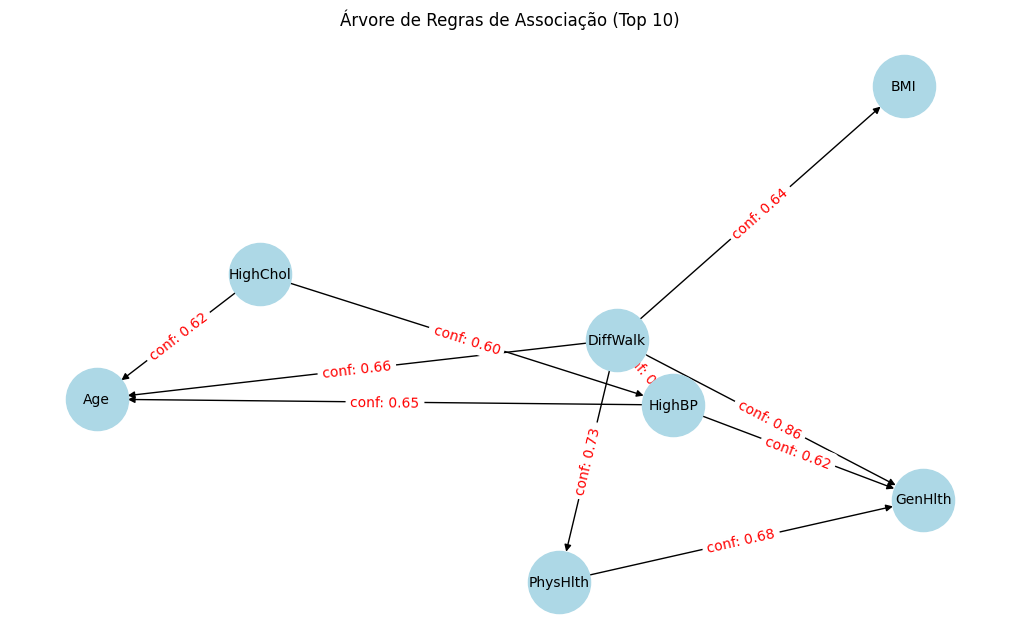

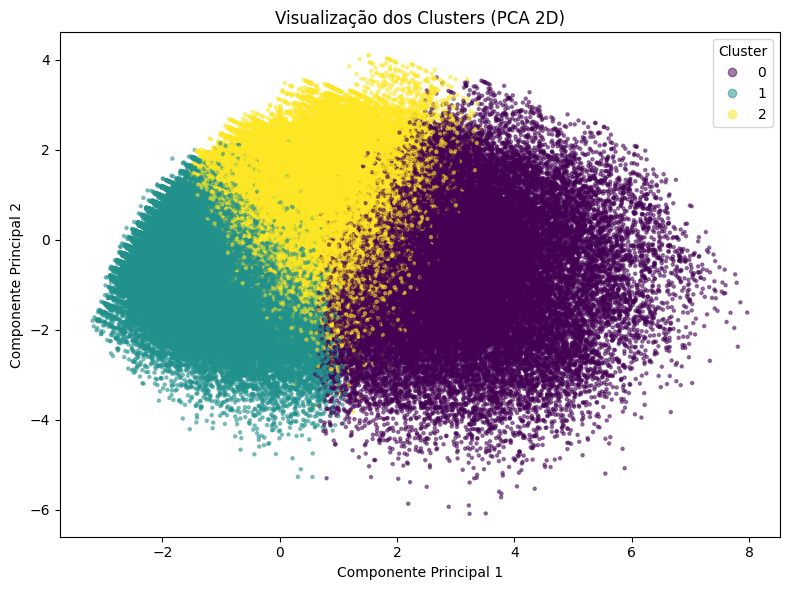

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Exibir as regras de associação em formato de árvore
def plot_association_rules_tree(rules, max_rules=10):
	G = nx.DiGraph()
	shown = 0
	for _, row in rules.head(max_rules).iterrows():
		antecedents = ', '.join([str(a) for a in row['antecedents']])
		consequents = ', '.join([str(c) for c in row['consequents']])
		G.add_edge(antecedents, consequents, weight=row['confidence'])
		shown += 1
	pos = nx.spring_layout(G, k=1.5)
	plt.figure(figsize=(10, 6))
	nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, arrows=True)
	edge_labels = nx.get_edge_attributes(G, 'weight')
	edge_labels = {k: f"conf: {v:.2f}" for k, v in edge_labels.items()}
	nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
	plt.title('Árvore de Regras de Associação (Top 10)')
	plt.show()

plot_association_rules_tree(rules)

# Gráfico de pontos dos clusters (usando duas features principais para visualização)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5, s=5)
plt.title('Visualização dos Clusters (PCA 2D)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

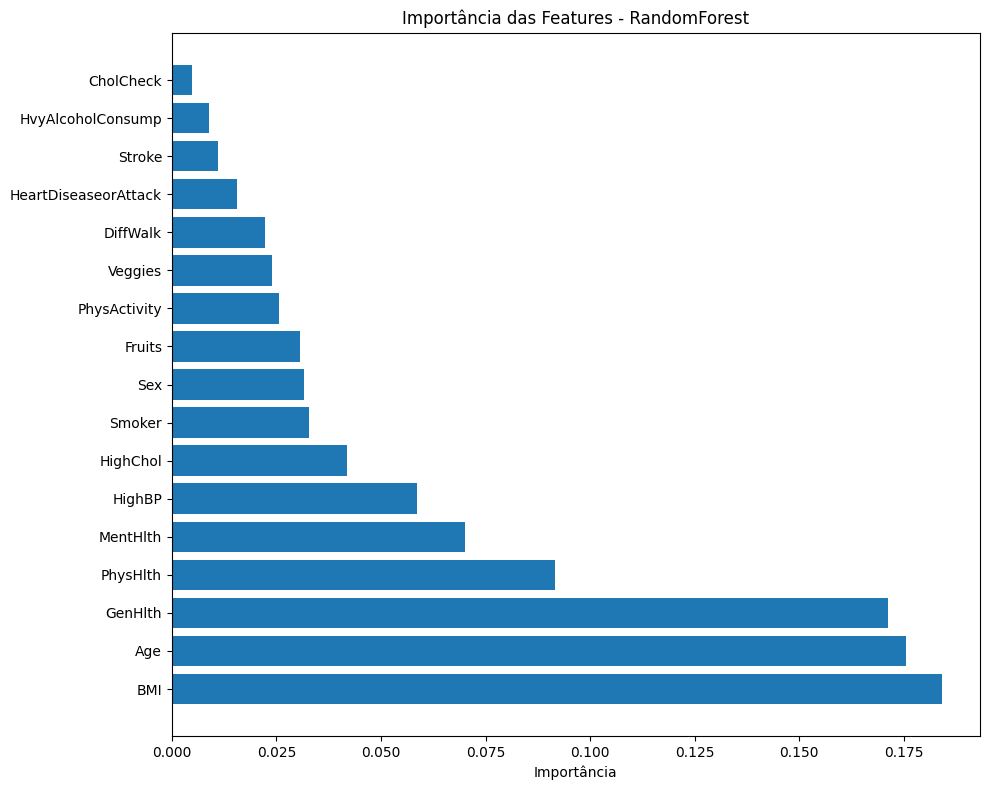

In [ ]:
#Importancia com feature_importances já que o SHAP pode demorar muito
model = RandomForestClassifier(max_depth=None,  random_state=32).fit(X_train_bal, y_train_bal)
importances = model.feature_importances_
importancia_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(importancia_df['feature'], importancia_df['importance'])
plt.xlabel('Importância')
plt.title('Importância das Features - RandomForest')
plt.tight_layout()
plt.show()

In [ ]:
import shap
from sklearn.ensemble import RandomForestClassifier

X_train_bal_df = pd.DataFrame(X_train_bal, columns=X.columns)


amostra = X_train_bal_df.sample(1000, random_state=32)
# SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(amostra)

# Plot
shap.summary_plot(shap_values, amostra)

/home/gabriel/Projetos/Pessoal/kessimha/pi-dsm-6-2025/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Explicação do Processo de Extração de Padrões e Importância das Variáveis

Nesta etapa do projeto, foram aplicadas técnicas de **clusterização (KMeans)**, **extração de regras de associação (Apriori)** e análise de **importância de variáveis** para identificar padrões relevantes e fatores de risco associados ao diabetes na base de dados.

---

## 1. Clusterização com KMeans

O algoritmo KMeans foi utilizado para agrupar os indivíduos em três clusters, correspondendo às classes: não diabético, pré-diabético e diabético.

```python
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_norm)
df_clusters = pd.DataFrame(X_norm, columns=X.columns)
df_clusters['Cluster'] = clusters

print(df_clusters['Cluster'].value_counts())
```

---

## 2. Extração de Regras de Associação (Apriori)

Para aplicar o Apriori, as variáveis foram binarizadas considerando a mediana como limiar. Assim, foi possível identificar padrões frequentes de características nos dados.

```python
from mlxtend.frequent_patterns import apriori, association_rules

X_bin = X.copy()
for col in X_bin.columns:
	X_bin[col] = (X_bin[col] > X_bin[col].median()).astype(int)

frequent_itemsets = apriori(X_bin, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
print(rules.head())
```

---

## 3. Visualização das Regras e dos Clusters

As regras de associação foram visualizadas em formato de árvore para facilitar a interpretação, e os clusters foram projetados em 2D usando PCA.

```python
def plot_association_rules_tree(rules, max_rules=10):
	# ... (função conforme implementada)
plot_association_rules_tree(rules)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5, s=5)
plt.title('Visualização dos Clusters (PCA 2D)')
plt.show()
```

---

## 4. Importância das Variáveis

Para identificar os atributos mais relevantes na classificação, foi utilizada a propriedade `feature_importances_` do RandomForest. O método SHAP, apesar de mais interpretável, foi descartado devido ao tempo excessivo de processamento em conjuntos de dados grandes.

```python
model = RandomForestClassifier(max_depth=None, random_state=32).fit(X_train_bal, y_train_bal)
importances = model.feature_importances_
importancia_df = pd.DataFrame({
	'feature': X.columns,
	'importance': importances
}).sort_values(by='importance', ascending=False)

plt.barh(importancia_df['feature'], importancia_df['importance'])
plt.xlabel('Importância')
plt.title('Importância das Features - RandomForest')
plt.show()
```

> **Observação:**  
> O método SHAP foi testado, porém não concluiu a execução devido ao alto custo computacional. Por isso, optou-se pelo uso do `feature_importances_` do RandomForest, que forneceu resultados rápidos e satisfatórios para a análise de importância dos atributos.

---

## **Resumo**

O processo de extração de padrões permitiu identificar grupos de risco, padrões de comportamento e os fatores mais relevantes para a classificação do diabetes, subsidiando recomendações personalizadas e ações preventivas.

# 📊 Análise de Padrões e Insights sobre Diabetes

A análise realizada sobre a base de dados de classificação de diabetes (não diabético, pré-diabético, diabético) revelou importantes padrões por meio de diferentes abordagens: RandomForest, PCA para clusterização e regras de associação com Apriori. Abaixo, são apresentados os principais insights extraídos.

---

## 1. Importância das Variáveis (Random Forest)

As variáveis mais influentes para a predição de diabetes foram:

| Variável     | Interpretação                                                   |
| ------------ | --------------------------------------------------------------- |
| **BMI**      | Maior IMC está fortemente associado ao risco de diabetes        |
| **Age**      | Idade avançada contribui diretamente para o risco               |
| **GenHlth**  | Avaliação geral da saúde é um fator chave                       |
| **PhysHlth** | Problemas físicos também contribuem significativamente          |
| **MentHlth** | A saúde mental aparece com importância moderada                 |
| **HighBP**   | Pressão alta é um indicativo comum entre pacientes com diabetes |

> Existe um perfil de risco baseado em idade, obesidade e percepção de saúde ruim.

---

## 2. Clusterização (PCA 2D)

A análise por PCA revelou três agrupamentos bem definidos:

| Cluster | Interpretação Provável                        |
| ------- | --------------------------------------------- |
| 0       | Provável maioria dos **não diabéticos**       |
| 1       | Prováveis **pré-diabéticos**                  |
| 2       | Grupo mais distinto, prováveis **diabéticos** |

> Mesmo sem rotular as classes, podemos ver separação clara, evidenciando a qualidade da base de dados

---

## 3. Regras de Associação (Apriori)

As principais regras com maior confiança identificadas foram:

| Regra                 | Confiança | Interpretação                                         |
| --------------------- | --------- | ----------------------------------------------------- |
| `DiffWalk → PhysHlth` | 0.73      | Dificuldade para andar se associa a saúde física ruim |
| `HighBP → GenHlth`    | 0.86      | Pressão alta está ligada a saúde geral ruim           |
| `DiffWalk → GenHlth`  | 0.62      | Problemas locomotores indicam saúde ruim              |
| `HighChol → Age`      | 0.62      | Colesterol alto tende a ocorrer em idosos             |

>  Fatores de risco se encadeiam: hipertensão, mobilidade prejudicada e saúde percebida compõem um caminho de alerta.

---

## Conclusões sobre as análises dos padrões obtidos 

O procedimento realizado, indica que um fator de risco para diabetes é idade + imc + idade. A análise de Random Forest destacou a importância do IMC e da idade, enquanto a clusterização por PCA separou claramente os grupos de não diabéticos, pré-diabéticos e diabéticos. As regras de associação reforçaram a conexão entre hipertensão, problemas de mobilidade e percepção negativa da saúde.
A combinação dessas análises fornece uma visão abrangente dos fatores de risco associados ao diabetes, permitindo identificar grupos vulneráveis e direcionar intervenções específicas.

---

## Implicações Práticas

Esses insights podem ser utilizados para direcionar intervenções de saúde pública, campanhas de conscientização e estratégias de prevenção focadas nos grupos de risco identificados. A combinação dessas técnicas analíticas oferece uma visão abrangente e prática sobre o diabetes, permitindo ações mais eficazes na gestão da doença.

---
